# Bitcoin Ransomware Fraud detection

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
bitcoindf =pd.read_csv('/home/sarthak/ML Hindi/BitcoinHeistData.csv',delimiter=',')

In [3]:
bitcoindf.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [4]:
print(len(bitcoindf['label'].unique()))
bitcoindf['label'].unique()

29


array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [5]:
ransomware_list = ['princetonCerber','princetonLocky','montrealCryptoLocker',
                    'montrealCryptXXX','montrealWannaCry','montrealDMALockerv3', 'montrealCryptoTorLocker2015',
                    'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt','montrealDMALocker', 'montrealGlobe',
                    'montrealEDA2','montrealVenusLocker', 'montrealXTPLocker','montrealGlobev3', 'montrealJigSaw',
                    'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy','montrealCryptConsole', 'montrealGlobeImposter',
                    'montrealSam','montrealComradeCircle', 'montrealAPT',
                   'paduaCryptoWall','paduaKeRanger','paduaJigsaw']
bitcoindf.replace(ransomware_list,'ransomeware',inplace = True)


In [6]:
bitcoindf.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [7]:
bitcoindf.replace('ransomeware',1,inplace = True)
bitcoindf.replace('white',2,inplace = True)
bitcoindf

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,1
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,2
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,2
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,2
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,2


In [8]:
bitcoindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


In [9]:
bitcoindf['day'].value_counts()

78     8454
77     8391
79     8386
76     8383
81     8357
       ... 
346    7044
363    7043
349    7042
361    7039
348    7038
Name: day, Length: 365, dtype: int64

In [10]:
bitcoindf['length'].value_counts()

0      708621
144    624842
2      357209
4      187632
6      127337
        ...  
98       3759
112      3625
110      3588
108      3586
106      3563
Name: length, Length: 73, dtype: int64

In [11]:
bitcoindf['weight'].value_counts()

1.000000e+00    549626
5.000000e-01    443270
2.500000e-01    144656
1.250000e-01     81152
6.250000e-02     51360
                 ...  
2.717846e-14         1
6.087266e-02         1
5.945927e-02         1
1.574504e+00         1
2.507724e-01         1
Name: weight, Length: 784927, dtype: int64

In [12]:
bitcoindf['count'].value_counts()

1        1673550
2         149226
3          62376
4          36705
5          24318
          ...   
12129          1
12356          1
14004          1
11011          1
10283          1
Name: count, Length: 11572, dtype: int64

In [13]:
bitcoindf['looped'].value_counts()

0        2504877
1          61842
2          17598
3           9119
4           5915
          ...   
11799          1
10793          1
7694           1
8249           1
7652           1
Name: looped, Length: 10168, dtype: int64

In [14]:
bitcoindf['label'].value_counts()

2    2875284
1      41413
Name: label, dtype: int64

In [15]:
bitcoindf.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09,1.985801e+00
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11,1.183089e-01
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,1.000000e+00
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07,2.000000e+00
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08,2.000000e+00
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08,2.000000e+00
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,2.000000e+00


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'looped'}>],
       [<AxesSubplot:title={'center':'neighbors'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

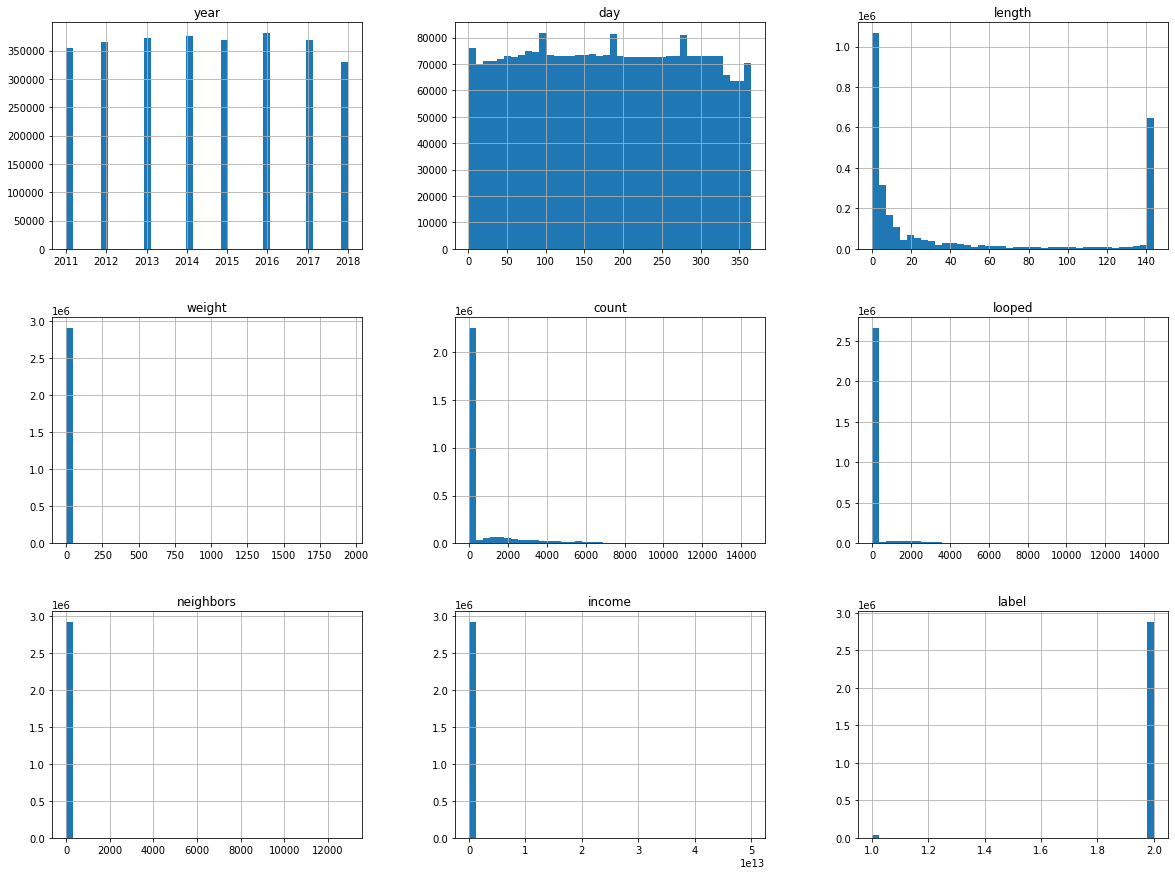

In [16]:
%matplotlib inline
bitcoindf.hist(bins=40, figsize=(20,15))

In [17]:
bitcoindf.corr()


,year,day,length,weight,count,looped,neighbors,income,label
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,-0.021367
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,0.008097
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,0.006860
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,-0.002676
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,0.008654
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,0.017810
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,0.000872
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,0.002716
label,-0.021367,0.008097,0.006860,-0.002676,0.008654,0.017810,0.000872,0.002716,1.000000


## Train test spliting

In [18]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size=int(len(data) * test_ratio)
    test_indices = shuffled[ : test_set_size]
    train_indices=shuffled[test_set_size : ]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set= split_train_test(bitcoindf, 0.2)

In [20]:
print(len(train_set))

2333358


In [21]:
print(len(test_set))

583339


In [22]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(bitcoindf,test_size=0.2, random_state=42)

In [23]:
print(len(train_set))

2333357


In [24]:
print(len(test_set))

583340


# Stratified Sampling

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(bitcoindf,bitcoindf['year']):
    strat_train_set=bitcoindf.loc[train_index]
    strat_test_set= bitcoindf.loc[test_index]

In [26]:
strat_train_set

,address,year,day,length,weight,count,looped,neighbors,income,label
1547692,19eiAbk7MDSthUwB6GAhM6dLHV4Jpa3pz4,2015,56,144,0.006181,3359,3329,2,1.696601e+08,2
356573,1NnoPyHVBe84v5CJvUQ3UqzdWBYLtpFx3R,2011,325,2,0.500000,1,0,2,3.895013e+08,2
665266,1DatcweV9Czkd1kZb9vTHpM22f69sVFFFV,2012,269,2,0.009179,34,0,2,2.313225e+08,2
2249589,146PJgA9DdYAx6wD5799fDLUSTh7QAk7Sf,2017,28,0,1.000000,1,0,1,8.346732e+07,2
285265,1LfXe7Co8qpx1vXoyWCgbowuTV9ergeutL,2011,254,12,0.250000,8,0,1,3.755612e+08,2
...,...,...,...,...,...,...,...,...,...,...
1874776,1PjuLX29QEuhJsRmzh4iTCjaMGGHAes1yH,2016,19,0,1.000000,1,0,2,1.740064e+09,2
1894092,15ZopQAHJ6vShcY9oxDCVTxXrTdiwJAUt6,2016,38,0,2.000000,2,0,2,1.093090e+08,2
1318181,1NP6TqsvBTbh1Mk4HV6JsT3J1sazHs84hy,2014,192,0,0.500000,1,0,1,4.480000e+08,2
2406578,1D7wtKVad7iV3jyuyFwj14AMGmD8QMVpGC,2017,185,0,1.000000,1,0,1,1.492972e+08,2


In [27]:
strat_test_set

,address,year,day,length,weight,count,looped,neighbors,income,label
1185620,14ezk9yeiAvhPScZjowxEwXvfzxnGXj1Ws,2014,59,2,0.500000,1,0,1,8.000000e+08,2
2093409,17mkwkcU3c5XGo3vntmFaaZtZs2dmQ76cL,2016,237,144,0.507010,724,0,2,4.791299e+07,2
1822267,3BLmzFX6XFmzmpD7UF2FZpET9wAqubz2GC,2015,331,144,0.013835,742,0,2,3.174439e+08,2
442767,1FH5jkx4SMCcXqnXo7wCxVYALUPpXRVyhu,2012,47,8,0.019444,18,0,1,1.001817e+08,2
2643276,3MgPQreenzUFBkbubEHGrhoJ6VN3a2YRtD,2018,57,0,0.333333,1,0,1,1.840182e+08,2
...,...,...,...,...,...,...,...,...,...,...
1779228,1EoPsogudU38MEL6t85t2AooUW8QFLHncS,2015,288,144,0.013028,3695,0,2,2.760000e+08,2
1990549,1L6nXnSkczCoZSgyq6nL7XXhAkhJXbUS8G,2016,134,0,1.000000,1,0,2,7.000000e+07,2
2042303,1Fw8wi9VFMN17NajW3hcN3gPDdJMuVYbLz,2016,186,12,0.001936,8,0,2,4.000000e+07,2
1537646,16V2Fpd1P11fZ77ceSBeSGDUkHZk1wmeT6,2015,46,0,1.000000,1,0,1,3.272000e+08,2


In [28]:
bitcoindf.corr()


,year,day,length,weight,count,looped,neighbors,income,label
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,-0.021367
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,0.008097
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,0.006860
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,-0.002676
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,0.008654
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,0.017810
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,0.000872
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,0.002716
label,-0.021367,0.008097,0.006860,-0.002676,0.008654,0.017810,0.000872,0.002716,1.000000


In [29]:
from pandas.plotting import scatter_matrix

In [ ]:
attr =  ['label','year','length','weight','count','looped','neighbors','income',]
scatter_matrix(bitcoindf[attr],figsize=(14,10 ))